In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import ReadVitalData
#import ReadDrugsData
import seaborn as sns

In [2]:
vital = ReadVitalData.vital
#mydi = ReadDrugsData.mydi
klients = ReadVitalData.klients

In [3]:
vital_bz = vital[vital.bezeichnung.isin(["Blutzucker", "Blutzucker mmol/l"])]
vital_bz["wert"] = [float(str(x).replace(",",".").replace("mg/dl","")) for x in vital_bz.wert]
#len(vital_bz.klientid2.unique())

#num = pd.to_numeric(vital_bz.wert,errors='coerce')
#vital_bz["wert"] = num

<ipython-input-3-9852a6771900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vital_bz["wert"] = [float(str(x).replace(",",".").replace("mg/dl","")) for x in vital_bz.wert]


In [4]:
d = dict()
for k in klients:
    vital_klient = vital_bz[vital_bz.klientid2 == k]
    average = vital_klient.wert.mean()
    if average < 20:
        average *=18.0182
    d[k] = average
d

{4147202: 161.16324710080286,
 2107402: 124.7609756097561,
 1599502: 203.31297709923663,
 1962002: 181.17838850165987,
 690203: 180.75360082304528,
 2076702: 232.24307199738877,
 1218602: 206.4429936596906,
 1077301: 192.2815342032424,
 577602: 178.11368085157767,
 751702: 165.52604166666666,
 2445402: 207.6085237801112,
 1122402: 244.90247678018576,
 102502: 209.5156331422616,
 1134702: 224.9797739440809,
 4176002: 182.37784760408485,
 1505501: 241.12976256212036,
 4628702: 219.40013796594124,
 1919202: 201.60590500641848,
 2998502: 229.1117374005305,
 4995302: 242.13725490196077,
 2337003: 248.72876151484135,
 1900802: 238.9463601532567,
 2212102: 262.10262086513995,
 1921303: 255.55713094245203,
 3051803: 192.8914855611789,
 196902: 187.6341351133617,
 5880102: 242.1157032213845,
 1028402: 214.24150437246902,
 1800502: 177.89709744864874,
 2589003: 208.0381679389313,
 2140502: 163.16140002229315,
 711002: 210.6601883390102,
 967003: 271.9459841628959,
 1530202: 198.26133960079832,
 

In [5]:
ave_klient = pd.DataFrame(data = zip(d.keys(), d.values()), columns=["klientid2","bz_average"])
#ave_klient.bz_average.hist()

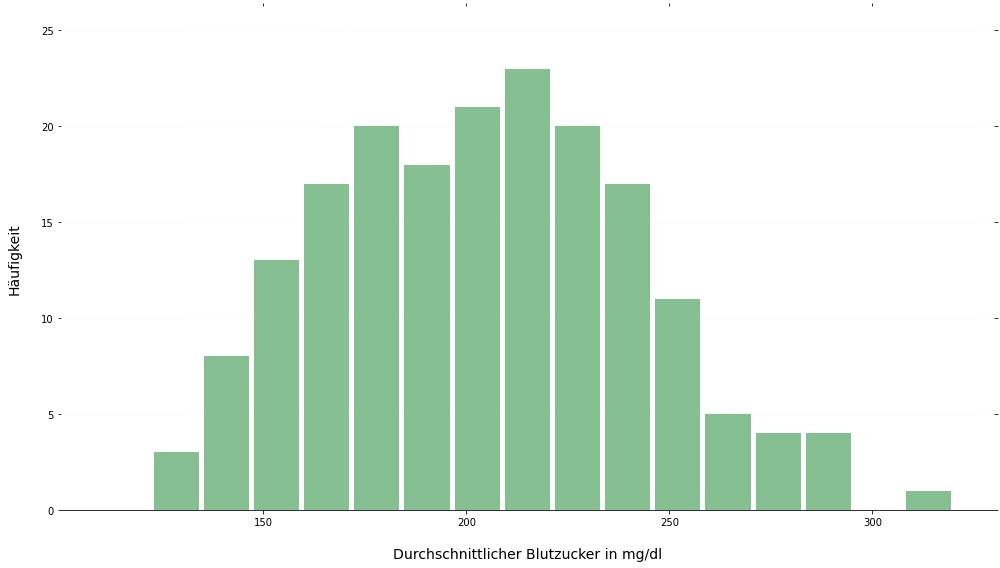

In [6]:
fig, ax = plt.subplots()
bins = np.linspace(110,320,18)
ax = ave_klient.bz_average.hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)

ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Durchschnittlicher Blutzucker in mg/dl",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Einstellung_Blutzucker.pdf")

In [7]:
ave_klient.bz_average.quantile(0.15)

162.11236136400615

In [8]:
box_klients = [4147202,2107402,1599502,1122402,1475102,1091402]
vital_bz_select = vital_bz[vital_bz.klientid2.isin(box_klients)]
vital_bz_select

,id,klientid,datum,bezeichnung,wert,einheit,wurdeunterschritten,wurdeueberschritten,klientid2
191255,3108537,10914,2018-10-01 17:30:00,Blutzucker,288.0,mg/dl,0,0,1091402
191256,3108538,10914,2018-10-02 04:00:00,Blutzucker,243.0,mg/dl,0,0,1091402
191257,3108539,10914,2018-10-02 07:30:00,Blutzucker,403.0,mg/dl,0,0,1091402
191258,3108540,10914,2018-10-02 09:10:00,Blutzucker,331.0,mg/dl,0,0,1091402
191259,3108541,10914,2018-10-02 11:30:00,Blutzucker,338.0,mg/dl,0,0,1091402
...,...,...,...,...,...,...,...,...,...
506730,8387921,41472,2018-10-25 06:30:00,Blutzucker,108.0,mg/dl,0,0,4147202
506731,8387922,41472,2018-10-26 08:30:00,Blutzucker,187.0,mg/dl,0,0,4147202
506732,8387923,41472,2018-10-26 14:21:00,Blutzucker,194.0,mg/dl,0,0,4147202
506733,8387924,41472,2018-10-27 06:30:00,Blutzucker,133.0,mg/dl,0,0,4147202


In [10]:
vital_bz_select[vital_bz_select.klientid2 == 4147202].describe()

,id,klientid,wert,wurdeunterschritten,wurdeueberschritten,klientid2
count,1.121000e+03,1121.0,1121.000000,1121.0,1121.000000,1121.0
mean,8.165750e+06,41472.0,161.163247,0.0,0.000892,4147202.0
std,2.789941e+04,0.0,39.719925,0.0,0.029867,0.0
min,8.156155e+06,41472.0,70.000000,0.0,0.000000,4147202.0
25%,8.158559e+06,41472.0,136.000000,0.0,0.000000,4147202.0
50%,8.161458e+06,41472.0,158.000000,0.0,0.000000,4147202.0
75%,8.167719e+06,41472.0,180.000000,0.0,0.000000,4147202.0
max,8.387925e+06,41472.0,570.000000,0.0,1.000000,4147202.0


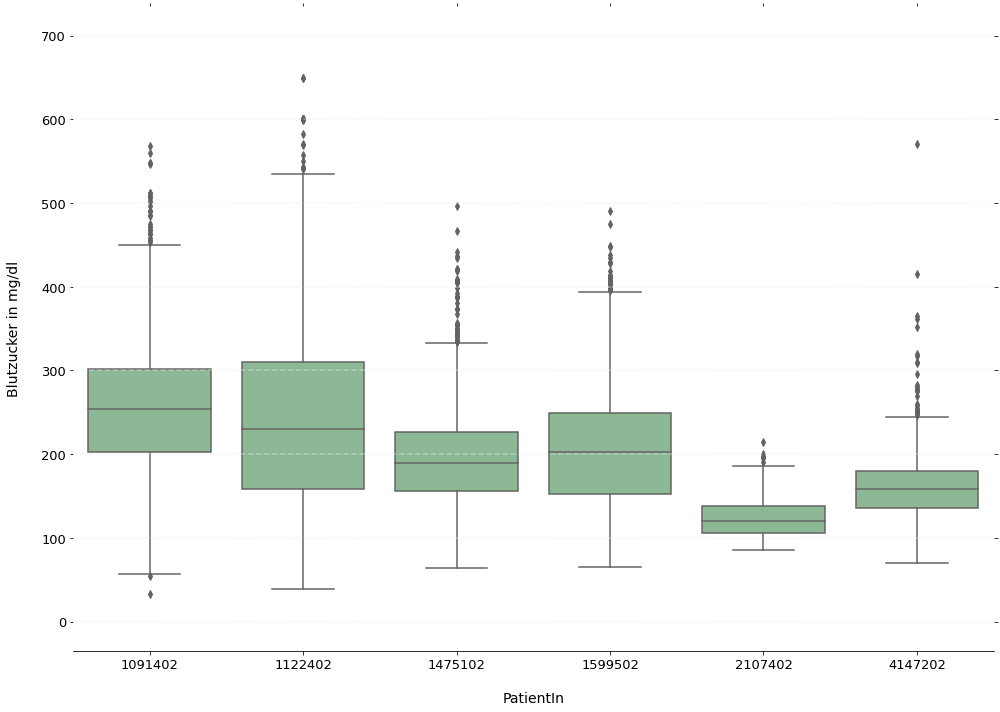

In [9]:
fig, axes = plt.subplots(figsize=(14,10))
sns.boxplot(ax=axes, x='klientid2', y='wert', data = vital_bz_select,
            color = '#86bf91')
axes.zorder = 1
axes.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
axes.set_ylabel('Blutzucker in mg/dl',labelpad=20, size=14)
axes.set_xlabel("PatientIn",labelpad=20, size=14)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['left'].set_visible(False)

axes.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="off", left="off", right="off", labelleft="off")
vals = axes.get_yticks()
for tick in vals:
    axes.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=2)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
fig.tight_layout()
plt.savefig("Boxplot_Blutzucker.pdf")